# 데이터 불러오기

In [1]:
%matplotlib inline
import os
import glob
import pandas
import cv2 as cv

In [2]:
base_path = os.path.join("data")
image_paths = glob.glob(os.path.join(base_path, "train_gt", "*.png"))
print(image_paths[:5])

['data/train_gt/TRAIN_00907.png', 'data/train_gt/TRAIN_21777.png', 'data/train_gt/TRAIN_08657.png', 'data/train_gt/TRAIN_28692.png', 'data/train_gt/TRAIN_22014.png']


# 마스크 생성 함수

In [114]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [115]:
IMAGE_SIZE = 512

def generate_squeare(mask):
    width = np.random.randint(20, 150)
    height = np.random.randint(20, 150)
    
    min_x = np.random.randint(0, IMAGE_SIZE-width)
    min_y = np.random.randint(0, IMAGE_SIZE-height)
    
    cv.rectangle(mask, (min_x, min_y), (min_x+width, min_y+height), 255, -1)
    
    return mask

def generate_circle(mask):
    radius = np.random.randint(20, 150)
    
    center_x = np.random.randint(radius, IMAGE_SIZE - radius)
    center_y = np.random.randint(radius, IMAGE_SIZE - radius)
    
    cv.circle(mask, (center_x, center_y), radius, 255, -1)
    
    return mask

def generate_polygon(mask):
    num_side = random.randint(3, 6)
    
    u = 2 * np.random.random(num_side) - 1
    v = 2 * np.random.random(num_side) - 1
    
    angles = np.arctan2(v, u)
    distance = np.sqrt(u**2 +  v**2)
    
    sort_idx = np.argsort(angles)
    u_sorted = u[sort_idx]
    v_sorted = v[sort_idx]
    
    x_img = ((u + 1) * (IMAGE_SIZE/2)).astype(np.int32)
    y_img = ((v + 1) * (IMAGE_SIZE/2)).astype(np.int32)
    
    points = np.column_stack((x_img, y_img))
    
    cv.fillPoly(mask, [points], 255)
        
    return mask
        

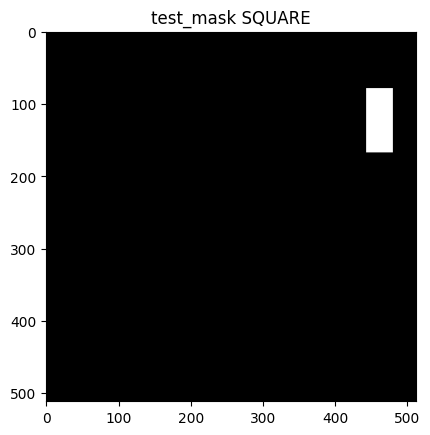

In [138]:
MASK_MAP = ["SQUARE", "SQUARE", "CIRCLE", "POLYGON"]

def generate_mask():
    mask = np.zeros((512, 512), dtype="uint8")
    idx = np.random.randint(0, 4)
    
    if MASK_MAP[idx] == "SQUARE":
        mask = generate_squeare(mask)
    elif MASK_MAP[idx] == "CIRCLE":
        mask = generate_circle(mask)
    else:
        mask = generate_polygon(mask)
    
    return mask, MASK_MAP[idx]

        
test_mask, mask_type = generate_mask()
plt.imshow(test_mask, cmap="gray")
plt.title(f"test_mask {mask_type}")
plt.show()

# 학습 데이터 생성

In [135]:
MASK_PATH = os.path.join(base_path, "train_mask")
IMAGE_PATH = os.path.join(base_path, "train_input")
os.makedirs(MASK_PATH, exist_ok=True)
os.makedirs(IMAGE_PATH, exist_ok=True)

In [173]:
for image_path in image_paths:
    file_name = image_path.split("/")[-1]
    image_rgb = cv.imread(image_path)
    image_gray = cv.cvtColor(image_rgb, cv.COLOR_BGR2GRAY)
    
    mask, _ = generate_mask()
    masked_image = np.where(mask == 255, np.random.randint(0, 101), image_gray)

    cv.imwrite(os.path.join(MASK_PATH, file_name), mask)
    cv.imwrite(os.path.join(IMAGE_PATH, file_name), masked_image)

# 그레이스케일 이미지 생성

In [3]:
IMAGE_PATH = os.path.join(base_path, "train_gray")
os.makedirs(IMAGE_PATH, exist_ok=True)

for image_path in image_paths:
    file_name = image_path.split("/")[-1]
    image_rgb = cv.imread(image_path)
    image_gray = cv.cvtColor(image_rgb, cv.COLOR_BGR2GRAY)
    cv.imwrite(os.path.join(IMAGE_PATH, file_name), image_gray)